# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

631

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

In [3]:
city_list = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

In [4]:
# creating base urls for APIs
url = "http://api.openweathermap.org/data/2.5/weather?"

# For each city create URL and the API request
for city in cities:
    
    query_url = f'{url}appid={weather_api_key}&units=imperial&q={city}'
    city_weather = requests.get(query_url).json()
    
    try: 
        
        city_list.append(city_weather['name'])
        cloudiness.append(city_weather['clouds']['all'])
        country.append(city_weather['sys']['country'])
        date.append(city_weather['dt'])
        humidity.append(city_weather['main']['humidity'])
        lat.append(city_weather['coord']['lat'])
        lng.append(city_weather['coord']['lon'])
        max_temp.append(city_weather['main']['temp_max'])
        wind_speed.append(city_weather['wind']['speed'])
        print(f'Processing {cities.index(city)}: {city}')
    except:
        print(f"We could not find {city}")
        pass

Processing 0: qaanaaq
Processing 1: kapaa
Processing 2: champerico
Processing 3: puerto ayora
Processing 4: bom jesus
We could not find illoqqortoormiut
Processing 6: port-gentil
Processing 7: bredasdorp
Processing 8: tempio pausania
Processing 9: ushuaia
Processing 10: guerrero negro
Processing 11: hermanus
Processing 12: punta arenas
Processing 13: rikitea
Processing 14: atuona
Processing 15: cascais
Processing 16: hokitika
Processing 17: chuy
Processing 18: coquimbo
Processing 19: new norfolk
Processing 20: cabo san lucas
Processing 21: albany
Processing 22: praia
Processing 23: georgetown
Processing 24: shaunavon
Processing 25: sinnamary
Processing 26: port alfred
Processing 27: olinda
We could not find tambul
We could not find malwan
Processing 30: yellowknife
Processing 31: arraial do cabo
Processing 32: burgeo
Processing 33: bluff
Processing 34: kirakira
Processing 35: margate
Processing 36: pevek
We could not find sentyabrskiy
Processing 38: souillac
Processing 39: longyearbyen

Processing 324: auki
Processing 325: elizabeth city
Processing 326: upernavik
Processing 327: namibe
Processing 328: ust-kuyga
Processing 329: bambous virieux
Processing 330: bukachacha
Processing 331: deep river
Processing 332: afrikanda
Processing 333: conde
Processing 334: hirara
Processing 335: hay river
We could not find lolua
Processing 337: khorixas
Processing 338: anadyr
Processing 339: stabat
Processing 340: loiza
Processing 341: aquiraz
Processing 342: carnarvon
Processing 343: sabla
Processing 344: tuscaloosa
Processing 345: takoradi
Processing 346: marzuq
Processing 347: pingliang
We could not find bandar-e torkaman
Processing 349: parabel
Processing 350: lakes entrance
Processing 351: svetlogorsk
Processing 352: tobol
Processing 353: progreso
Processing 354: barkly west
Processing 355: inhambane
Processing 356: kenai
Processing 357: luena
Processing 358: jian
Processing 359: bam
Processing 360: whitehorse
Processing 361: wufeng
Processing 362: ouesso
Processing 363: acapul

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# making dataframe to store weather data
city_weather_df = pd.DataFrame({
    "City": city_list,
    "Cloudiness": cloudiness, 
    "Country": country, 
    "Date": date, 
    "Humidity": humidity,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": max_temp,
    "Wind Speed": wind_speed,
})
city_weather_df

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Qaanaaq,99,GL,1612655288,86,77.4840,-69.3632,10.09,7.31
1,Kapaa,75,US,1612655233,49,22.0752,-159.3190,73.99,9.22
2,Champerico,20,GT,1612655323,55,14.3000,-91.9167,87.80,9.22
3,Puerto Ayora,62,EC,1612655282,91,-0.7393,-90.3518,78.01,3.00
4,Bom Jesus,100,BR,1612655747,91,-9.0744,-44.3586,73.81,1.28
...,...,...,...,...,...,...,...,...,...
580,Buraidah,75,SA,1612655815,100,26.3260,43.9750,50.00,9.22
581,Kenora,75,CA,1612655815,63,49.8167,-94.4337,-16.01,12.66
582,Price,1,US,1612655816,31,39.5994,-110.8107,44.60,4.61
583,Fuerte,6,PH,1612655816,70,17.5381,120.3644,78.76,3.42


In [6]:
# exporting to a csv file
city_weather_df.to_csv("cities.csv", encoding="utf-8", index=True)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
#  Get the indices of cities that have humidity over 100%.
city_weather_df['Humidity'].max()

100

In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = city_weather_df.drop(city_weather_df.loc[city_weather_df['Humidity'] > 100].index, inplace=False)

In [9]:
# checking the new cleaned dataset
clean_city_data

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Qaanaaq,99,GL,1612655288,86,77.4840,-69.3632,10.09,7.31
1,Kapaa,75,US,1612655233,49,22.0752,-159.3190,73.99,9.22
2,Champerico,20,GT,1612655323,55,14.3000,-91.9167,87.80,9.22
3,Puerto Ayora,62,EC,1612655282,91,-0.7393,-90.3518,78.01,3.00
4,Bom Jesus,100,BR,1612655747,91,-9.0744,-44.3586,73.81,1.28
...,...,...,...,...,...,...,...,...,...
580,Buraidah,75,SA,1612655815,100,26.3260,43.9750,50.00,9.22
581,Kenora,75,CA,1612655815,63,49.8167,-94.4337,-16.01,12.66
582,Price,1,US,1612655816,31,39.5994,-110.8107,44.60,4.61
583,Fuerte,6,PH,1612655816,70,17.5381,120.3644,78.76,3.42


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

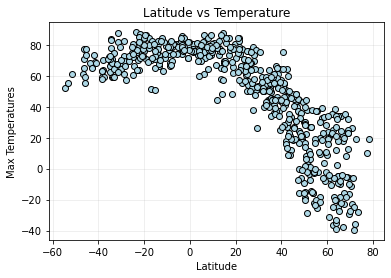

<Figure size 432x288 with 0 Axes>

In [18]:
# scatter plot of latitude vs temperature
plt.scatter(clean_city_data['Lat'], clean_city_data['Max Temp'], color='lightblue', edgecolor='black')
plt.title('Latitude vs Temperature')
plt.ylabel('Max Temperatures')
plt.xlabel('Latitude')
plt.grid(alpha=.25)
plt.show()
plt.savefig('../Images/LatvsTemp.png')

This plot is showing that highest temperatures seem to be closest to the equator, and the farther north you go the colder it gets while the farther south you go the warmer it gets.

## Latitude vs. Humidity Plot

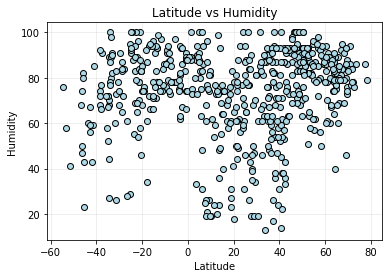

<Figure size 432x288 with 0 Axes>

In [23]:
# scatter plot of latitude vs humidity
plt.scatter(clean_city_data['Lat'], clean_city_data['Humidity'], color='lightblue', edgecolor='black')
plt.title('Latitude vs Humidity')
plt.ylabel('Humidity')
plt.xlabel('Latitude')
plt.grid(alpha=.25)
plt.show()
plt.savefig('../Images/LatvsHumidity.png')

There does not seem to be any strong correlation between latitude and humidity.

## Latitude vs. Cloudiness Plot

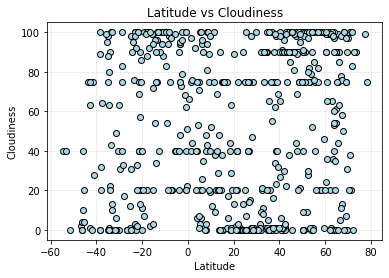

<Figure size 432x288 with 0 Axes>

In [21]:
# scatter plot of latitude vs Cloudiness
plt.scatter(clean_city_data['Lat'], clean_city_data['Cloudiness'], color='lightblue', edgecolor='black')
plt.title('Latitude vs Cloudiness')
plt.ylabel('Cloudiness')
plt.xlabel('Latitude')
plt.grid(alpha=.25)
plt.show()
plt.savefig('../Images/LatvsCloud.png')

From this plot it seems that cloudiness is not affected by the latitude and is evenly dispersed.  

## Latitude vs. Wind Speed Plot

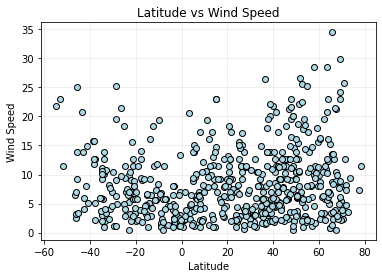

<Figure size 432x288 with 0 Axes>

In [22]:
# scatter plot of latitude vs Wind speed
plt.scatter(clean_city_data['Lat'], clean_city_data['Wind Speed'], color='lightblue', edgecolor='black')
plt.title('Latitude vs Wind Speed')
plt.ylabel('Wind Speed')
plt.xlabel('Latitude')
plt.grid(alpha=.25)
plt.show()
plt.savefig('../Images/LatvsWind.png')

This plot shows that wind speed widely distributed across the latitude.

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression